## The project - Investigating the impact of sleep deprivation on different species of fruit flies

### Step 1: Import Libraries and Load Data

In [40]:
import pandas as pd                        #imports 
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

### Load the data

In [4]:
file_name = "Metadata_1.xlsx"  # Tells python which dataset to read in
data = pd.read_excel(file_name) # Reads in the dataset we will be investigating


FileNotFoundError: [Errno 2] No such file or directory: 'Metadata_1.xlsx'

In [5]:
import os
print(os.getcwd())  # This will print the current working directory


C:\Users\xy24905\Applied Data Analysis


### Step 2: Visualize Metadata

In [42]:
print("Preview of the metadata:")
print(data.head())
print("\nColumns in the dataset:")
print(data.columns)


Preview of the metadata:
       species treatment           diet survival_30_10  time
0        D_mel        SD  standard_food          alive     0
1        D_mel         C  standard_food          alive     0
2  D_erecta_01        SD  standard_food          alive     0
3  D_erecta_01         C  standard_food          alive     0
4     D_sec_25        SD  standard_food          alive     0

Columns in the dataset:
Index(['species', 'treatment', 'diet', 'survival_30_10', 'time'], dtype='object')


### Step 3: Pre-processing the data 

In [43]:
# Convert 'survival_30_10' column to numeric (0 for alive, 1 for dead)
data['survival_30_10'] = data['survival_30_10'].map({'alive': 0, 'dead': 1}).astype(float)

# Drop rows with missing or invalid data in 'time' or 'survival_30_10'
data = data.dropna(subset=['time', 'survival_30_10'])

# Ensure 'time' column is numeric
data['time'] = pd.to_numeric(data['time'], errors='coerce')
data = data.dropna(subset=['time'])


### Step 4: Perform Survival Analysis


### This first initial plot is showing the different fly species altogether but as you can see, it is hard to see what is going on visually so in the next step we will do separate plots for each species

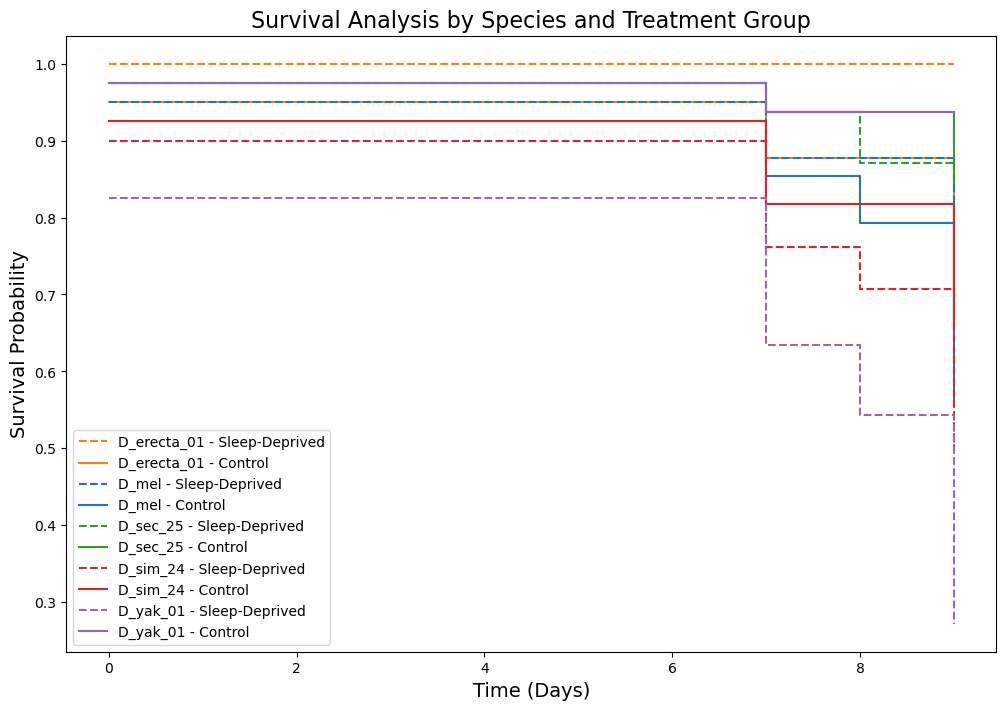

In [51]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Initialize the plot
plt.figure(figsize=(12, 8))

# Define a color mapping for species
species_list = data['species'].unique()
color_map = {species: color for species, color in zip(species_list, plt.cm.tab10.colors)}

# Group data by species
species_groups = data.groupby('species')

# Loop through each species
for species, group in species_groups:
    # Get color for this species
    color = color_map[species]

    # Separate control and sleep-deprived groups
    sd_group = group[group['treatment'] == 'SD']
    control_group = group[group['treatment'] == 'C']

    # Fit and plot survival curve for the sleep-deprived group
    if not sd_group.empty:
        kmf.fit(sd_group['time'], event_observed=sd_group['survival_30_10'], label=f"{species} - Sleep-Deprived")
        kmf.plot_survival_function(linestyle='--', color=color, ci_show=False)  # Dashed line, no CI

    # Fit and plot survival curve for the control group
    if not control_group.empty:
        kmf.fit(control_group['time'], event_observed=control_group['survival_30_10'], label=f"{species} - Control")
        kmf.plot_survival_function(linestyle='-', color=color, ci_show=False)  # Solid line, no CI

# Add title, labels, and legend
plt.title("Survival Analysis by Species and Treatment Group", fontsize=16)
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Survival Probability", fontsize=14)
plt.legend()
plt.show()


### The effect of sleep deprivation on the survival of 5 different species of fruit flies

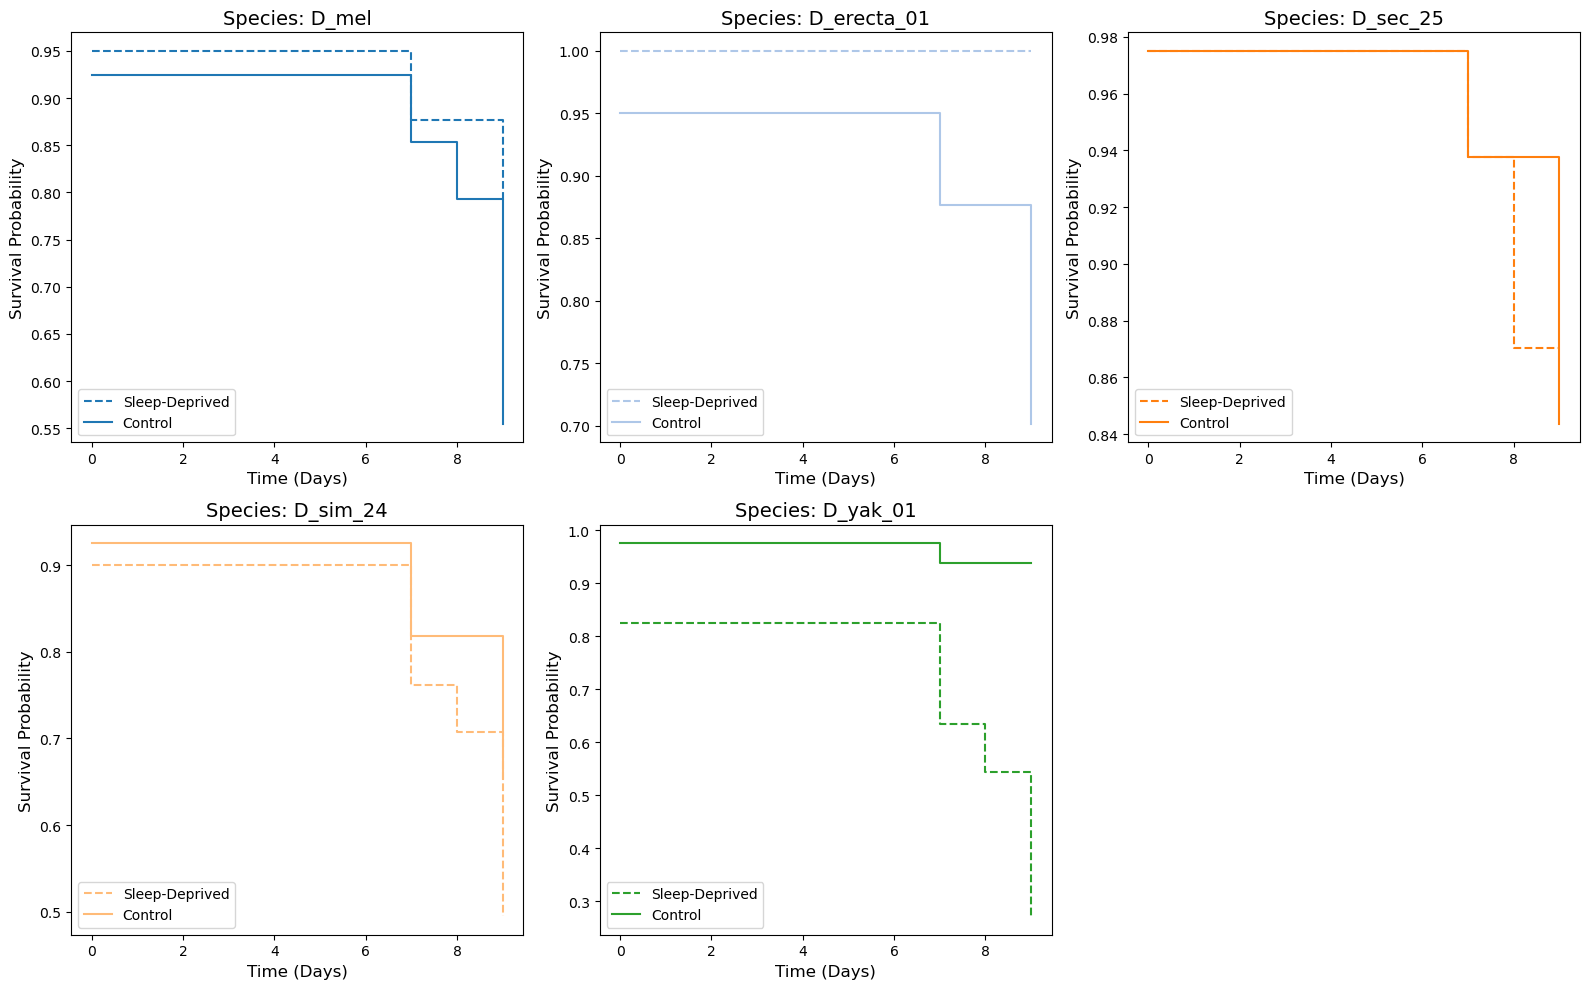

In [49]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize the Kaplan-Meier Fitter
kmf = KaplanMeierFitter()

# Get the list of unique species
species_list = data['species'].unique()

# Number of species
num_species = len(species_list)

# Define the layout for subplots (2 rows, 3 columns if there are 5 species)
rows = 2
cols = 3 if num_species > 3 else num_species

# Create the figure for subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))

# Flatten axes for easy indexing
axes = axes.flatten()

# Define a color map for consistency
color_map = {species: color for species, color in zip(species_list, plt.cm.tab20.colors)}

# Loop through each species and create a plot
for idx, species in enumerate(species_list):
    ax = axes[idx]  # Get the corresponding subplot axis
    group = data[data['species'] == species]

    # Separate control and sleep-deprived groups
    sd_group = group[group['treatment'] == 'SD']
    control_group = group[group['treatment'] == 'C']

    # Plot for the sleep-deprived group
    if not sd_group.empty:
        kmf.fit(sd_group['time'], event_observed=sd_group['survival_30_10'], label="Sleep-Deprived")
        kmf.plot_survival_function(ax=ax, linestyle='--', color=color_map[species], ci_show=False)

    # Plot for the control group
    if not control_group.empty:
        kmf.fit(control_group['time'], event_observed=control_group['survival_30_10'], label="Control")
        kmf.plot_survival_function(ax=ax, linestyle='-', color=color_map[species], ci_show=False)

    # Customize each subplot
    ax.set_title(f"Species: {species}", fontsize=14)
    ax.set_xlabel("Time (Days)", fontsize=12)
    ax.set_ylabel("Survival Probability", fontsize=12)
    ax.legend(fontsize=10)

# Hide unused subplots (if species < total grid size)
for i in range(num_species, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


### Number of fruit flies alive from day 0 to day 9


C:\Users\xy24905\AppData\Local\Temp\ipykernel_27356\3177873380.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


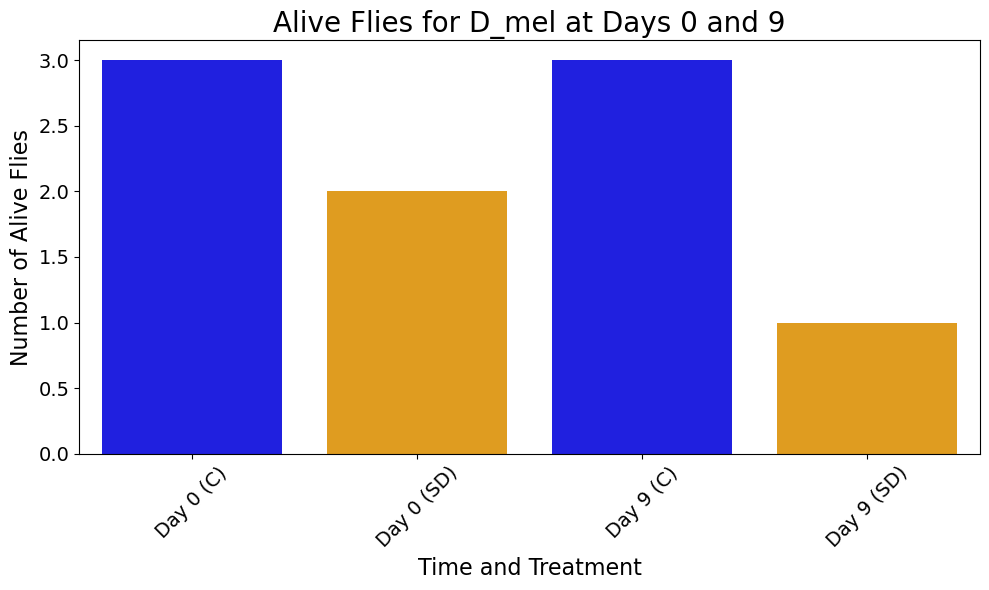

C:\Users\xy24905\AppData\Local\Temp\ipykernel_27356\3177873380.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


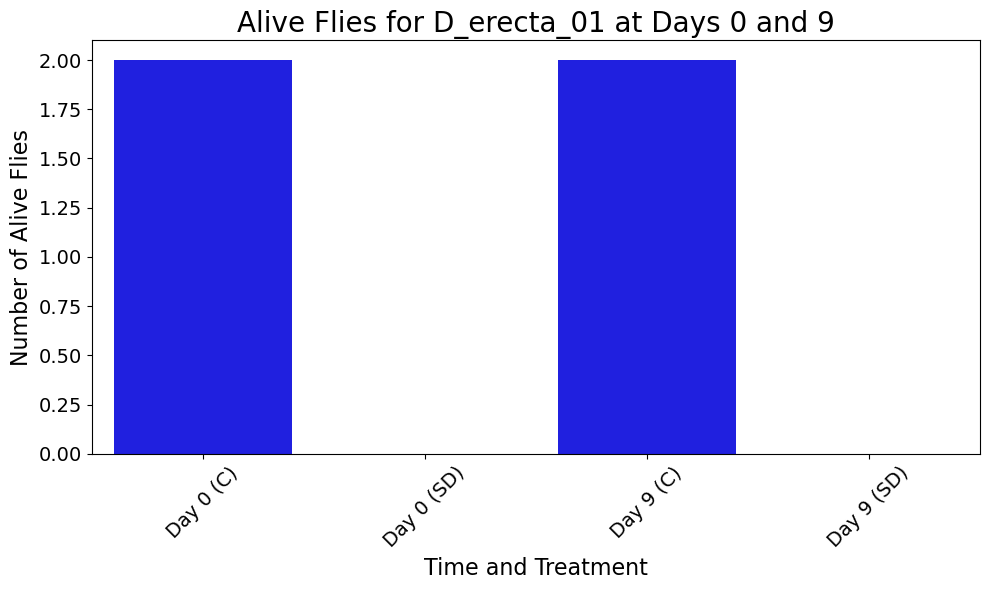

C:\Users\xy24905\AppData\Local\Temp\ipykernel_27356\3177873380.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


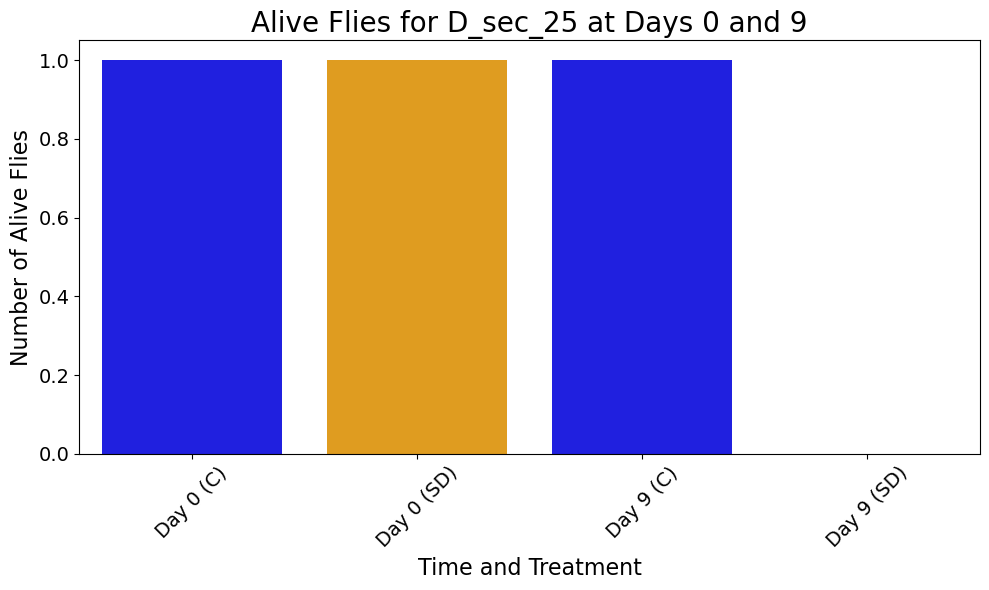

C:\Users\xy24905\AppData\Local\Temp\ipykernel_27356\3177873380.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


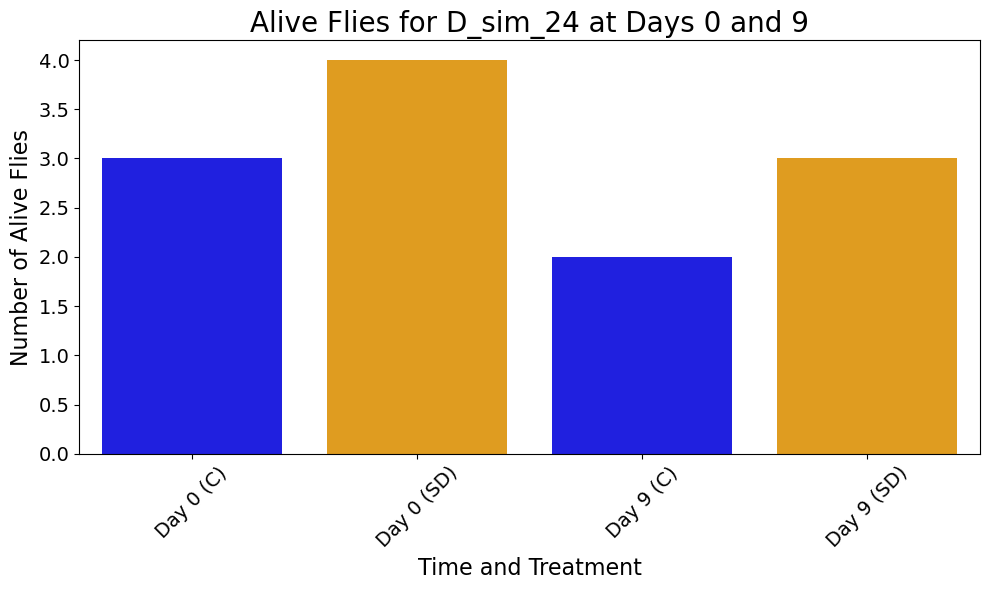

C:\Users\xy24905\AppData\Local\Temp\ipykernel_27356\3177873380.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


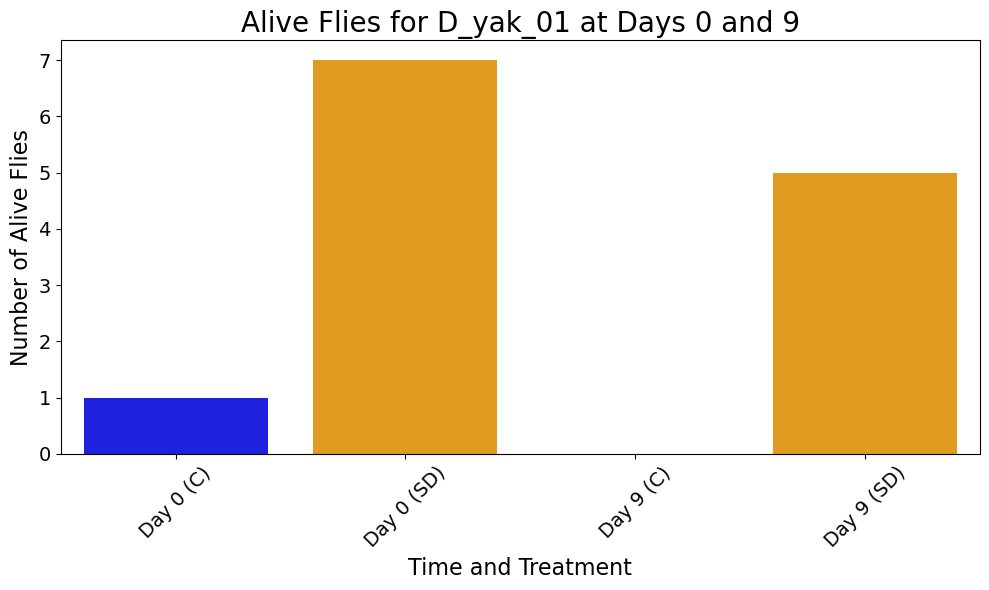

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by species, treatment, and time
grouped = data.groupby(['species', 'treatment', 'time'])['survival_30_10'].sum().reset_index()

# Filter for Day 0 and Day 9
filtered = grouped[grouped['time'].isin([0, 9])]

# Get the unique species
species_list = data['species'].unique()

# Loop through each species and plot
for species in species_list:
    # Filter data for the current species
    species_data = filtered[filtered['species'] == species]

    # Create the bar positions and labels
    bar_positions = ['Day 0 (C)', 'Day 0 (SD)', 'Day 9 (C)', 'Day 9 (SD)']
    bar_heights = [
        species_data[(species_data['time'] == 0) & (species_data['treatment'] == 'C')]['survival_30_10'].values[0],
        species_data[(species_data['time'] == 0) & (species_data['treatment'] == 'SD')]['survival_30_10'].values[0],
        species_data[(species_data['time'] == 9) & (species_data['treatment'] == 'C')]['survival_30_10'].values[0],
        species_data[(species_data['time'] == 9) & (species_data['treatment'] == 'SD')]['survival_30_10'].values[0],
    ]

    # Initialize the plot
    plt.figure(figsize=(10, 6))

    # Plot the bar chart for the current species
    sns.barplot(
        x=bar_positions, y=bar_heights, palette=["blue", "orange", "blue", "orange"]
    )

    # Customize the plot
    plt.title(f"Alive Flies for {species} at Days 0 and 9", fontsize=20)
    plt.xlabel("Time and Treatment", fontsize=16)
    plt.ylabel("Number of Alive Flies", fontsize=16)
    plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels for clarity
    plt.yticks(fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [1]:
pip install scipy statsmodels


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats  # For t-tests
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Group data by species, treatment, and time
grouped = data.groupby(['species', 'treatment', 'time'])['survival_30_10'].sum().reset_index()

# Filter for Day 0 and Day 9
filtered = grouped[grouped['time'].isin([0, 9])]

# Now you can check the data for each species and treatment
filtered.head()


NameError: name 'data' is not defined